In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df = df.fillna(df.mean())

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
import seaborn as sns

<Axes: >

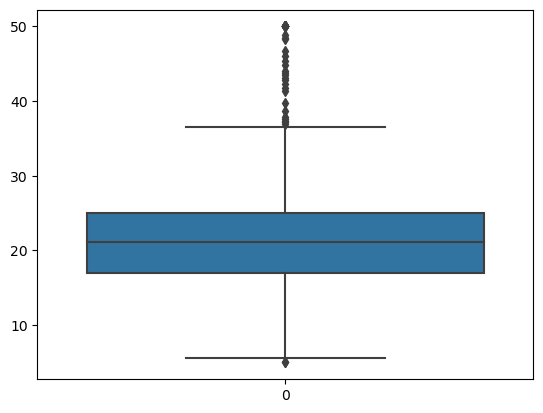

In [7]:
sns.boxplot(df['MEDV'])

In [8]:
import numpy as np

In [9]:
def outlier(df,data_item):
    data = sorted(df[data_item])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    cleaned_df = df[(df[data_item]>=lower_bound) & (df[data_item]<=upper_bound)]
    return cleaned_df

In [10]:
df = outlier(df,'MEDV')

<Axes: >

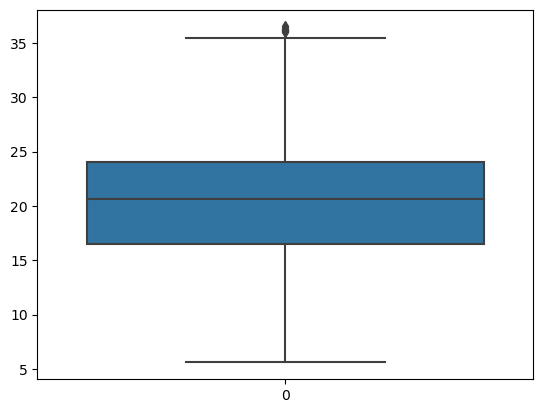

In [11]:
sns.boxplot(df['MEDV'])

In [12]:
import matplotlib.pyplot as plt

In [13]:
correlation = df.corr()

<Axes: >

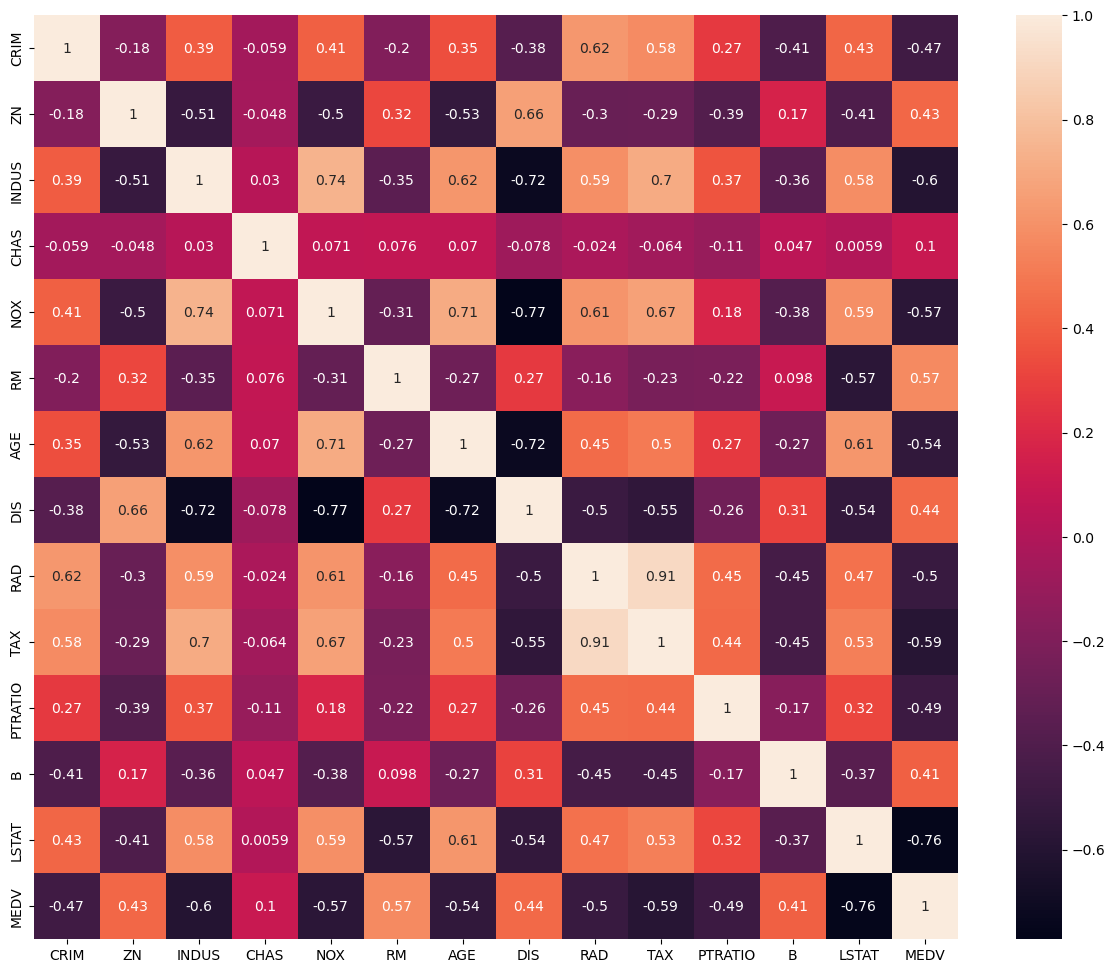

In [14]:
fig,axes = plt.subplots(figsize = (15,12))
sns.heatmap(correlation, annot=True, square=True)

In [15]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()

In [18]:
X_scaled = scalar.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [21]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [24]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100


12/12 [==============================] - 1s 17ms/step - loss: 460.3679 - mae: 20.4184 - val_loss: 358.5099 - val_mae: 17.9293
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 401.7842 - mae: 18.8274 - val_loss: 274.1549 - val_mae: 15.2407
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 274.7374 - mae: 15.0063 - val_loss: 127.5171 - val_mae: 9.5643
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 96.5154 - mae: 8.3665 - val_loss: 58.9794 - val_mae: 6.2422
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 55.5840 - mae: 5.8498 - val_loss: 22.9206 - val_mae: 3.6738
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 27.0940 - mae: 4.0562 - val_loss: 18.2807 - val_mae: 3.5760
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 22.1217 - mae: 3.5236 - val_loss: 13.8879 - val_mae: 2.9224
Epoch 8/100
12/12 [==============================] - 0s

Epoch 59/100
12/12 [==============================] - 0s 4ms/step - loss: 5.1941 - mae: 1.7500 - val_loss: 14.8272 - val_mae: 2.8168
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 5.1471 - mae: 1.7598 - val_loss: 14.5597 - val_mae: 2.8330
Epoch 61/100
12/12 [==============================] - 0s 4ms/step - loss: 5.0188 - mae: 1.7100 - val_loss: 14.4561 - val_mae: 2.7709
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 5.2084 - mae: 1.7174 - val_loss: 15.0486 - val_mae: 2.8427
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 4.9720 - mae: 1.7258 - val_loss: 14.7391 - val_mae: 2.8474
Epoch 64/100
12/12 [==============================] - 0s 4ms/step - loss: 4.8510 - mae: 1.6972 - val_loss: 14.7000 - val_mae: 2.8134
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 4.8524 - mae: 1.6910 - val_loss: 15.3718 - val_mae: 2.8876
Epoch 66/100
12/12 [==============================] - 0s 4ms/step - l

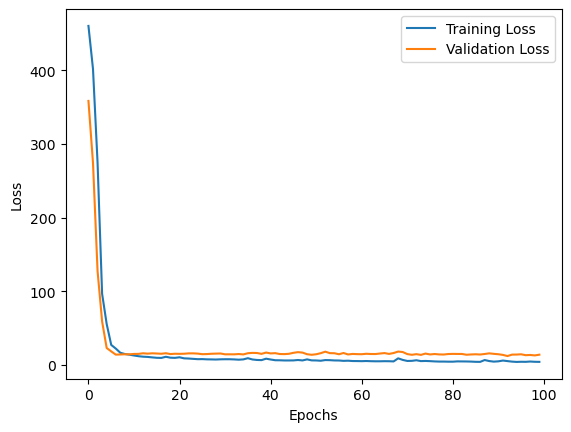

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
mse_nn,mae_nn = model.evaluate(X_test,y_test)
print('MAE : ',mae_nn)
print('MSE : ',mse_nn)

3/3 [==============================] - 0s 4ms/step - loss: 5.8882 - mae: 1.8597
MAE :  1.8597111701965332
MSE :  5.888166904449463


In [28]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [29]:
new_data = scalar.fit_transform([[0.08, 10.0, 8.0, 0.0, 0.5, 7.0, 50.0, 5.0, 2, 300, 20.0, 400.0, 10.0]])
prediction = model.predict(new_data)
print("Predicted House Price : ",prediction)

1/1 [==============================] - 0s 110ms/step
Predicted House Price :  [[11.2508745]]


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model_lr = LinearRegression()

In [32]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = model_lr.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mae_lr = mean_absolute_error(y_test,y_pred)
mse_lr = mean_squared_error(y_test,y_pred)
print('MAE : ',mae_lr)
print('MSE : ',mse_lr)

MAE :  2.2923925028173655
MSE :  10.488371485394005


In [36]:
new_data = scalar.fit_transform([[0.08, 10.0, 8.0, 0.0, 0.5, 7.0, 50.0, 5.0, 2, 300, 20.0, 400.0, 10.0]])
prediction = model_lr.predict(new_data)
print("Predicted House Price : ",prediction)

Predicted House Price :  [20.75213214]
